# Perturbation of Matrix Problems #

## Support Materials for the book _Perturbation methods using backward error_ by Corless and Fillion ##

### to be published by SIAM ###

Copyright (c) 2024 Robert M. Corless

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
with(LinearAlgebra):
macro( ep=varepsilon ):
A := Matrix( 2, 2, [[1,ep],[ep,1]]);

kilobytes used=1806, alloc=5424, time=0.27

In [2]:
Ai := A^(-1);

In [3]:
MatrixInverse(eval(A,ep=-1),method=pseudo);

In [4]:
Ak := map( series, Ai, ep, 5 );

In [5]:
seq( coeff(Ak,ep,j), j=0..4 );

In [6]:
(E,V) := Eigenvectors( A, output=['values', 'vectors']);

In [7]:
B := Copy(A);

In [8]:
B[1,2] := 1+ep;

$$1+\varepsilon$$

In [9]:
(E2,V2) := Eigenvectors(B, output=['values','vectors']);

In [10]:
map( series, V2, ep, 3 );

In [11]:
L := Matrix(5,5,(i,j)->`if`(i=j,1,`if`(i-1=j,1/c,0)));

In [12]:
DD := Matrix(5,5,(i,j)->`if`(i=j,c,0));

In [13]:
A := L.DD.Transpose(L);

In [14]:
evalf(2+sqrt(3));

$$ 3.73205080756888$$

In [15]:
A := Matrix(5,5,(i,j)->`if`(i=j,4,`if`(abs(i-j)=1,1,0)));

In [16]:
Digits := 15;
c := 2+sqrt(3.0);

                                 Digits := 15

$$ 3.73205080756888$$

In [17]:
map(eval,L);

In [18]:
U := DD.Transpose(L);
b := Vector(5,i->(-1)^i);
y0 := LinearSolve(L,b);
x0 := LinearSolve(U,y0);
r0 := b - A.x0; # keep for later
x := x0;
for k to 11 do
  r := b - A.x;
  y0 := LinearSolve(L,r);
  x0 := LinearSolve(U,y0);
  x := x + x0;
end do;
r := b - A.x;

                                [-0.365384615384615]

In [19]:
r0;

In [20]:
L := Matrix(5,5,(i,j)->`if`(i=j,1,`if`(i-1=j,1/2,0)));
DD := Matrix(5,5,(i,j)->`if`(i=j,4,0));
U := DD.Transpose(L);

                               [0    0    0    0    4]

In [21]:
A := L.U + ep*Matrix(5,5,(i,j)-> i mod j );

In [22]:
b := Vector(5,i->(-1)^i);
y0 := LinearSolve(L,b);
x0 := LinearSolve(U,y0);
r0 := b - A.x0; # keep for later
x := x0;
for k to 3 do
  r := map(expand,b - A.x);
  y0 := map(expand,LinearSolve(L,r));
  x0 := map(expand,LinearSolve(U,y0));
  x := x + x0;
end do;
r := map(expand,b - A.x);

           8589934592            ]

In [23]:
x;

In [24]:
evalf[5](x);

In [25]:
Norm(eval(A,ep=0),infinity);

$$9$$

In [26]:
Norm(eval(A,ep=0)^(-1), infinity );

$${\frac{203}{256}}$$

In [27]:
Ai := A^(-1);

kilobytes used=14019, alloc=14384, time=1.36

kilobytes used=23796, alloc=18480, time=2.30

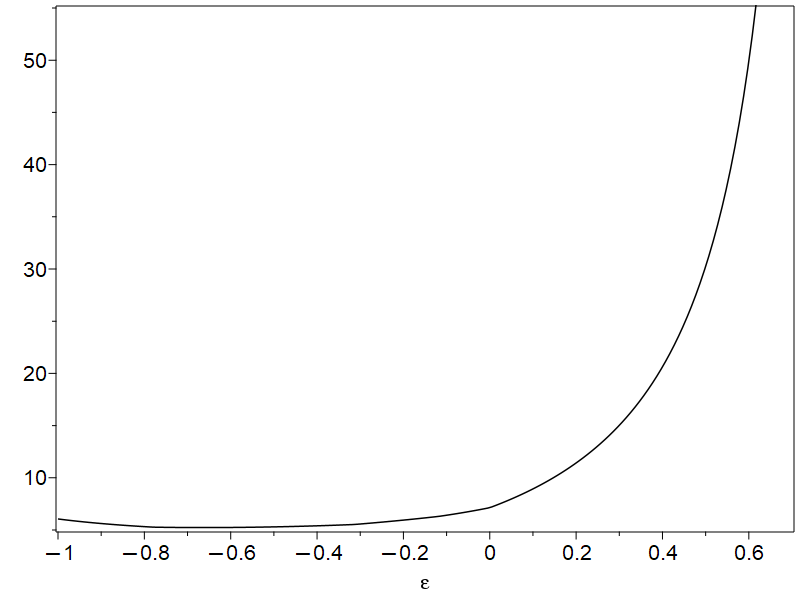

In [28]:
plot( Norm(A,infinity)*Norm(Ai,infinity), ep=-1..1 );

Let's find a value of $\varepsilon$ for which the matrix is singular.

In [29]:
p := Determinant(A);

$$-156 \varepsilon^{4}+598 \varepsilon^{3}-84 \varepsilon^{2}-1510 \varepsilon +1024$$

In [30]:
ah := realroot(p,2^(-1));

| | |
|:-:|:-:|
|-797/512|-199/128|
|29720202599257838957/36893488147419103232|59440405198515677915/73786976294838206464|
|551/256|69/32|
|311/128|623/256|


In [31]:
evalf[5](ah);

| | |
|:-:|:-:|
|-1.5566|-1.5547|
|.80557|.80557|
|2.1523|2.1562|
|2.4297|2.4336|


Thus the matrix will be nonsingular only for a restricted range of $\varepsilon$.  For small values, it will be fine.